In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import jarque_bera
import matplotlib.patches as mpatches
import attila_utils

## Data import and engineering

In [2]:
treatments_CO28152 = {
    'A': 'Amiloride TG',
    'B': 'HCQ TG',
    'C': 'HCQ nano TG',
    'D': 'Saline TG',
    'E': 'R-HCQ TG',
    'F': 'S-HCQ TG',
    'G': 'TUDCA TG',
    'H': 'Saline WT',
    'I': 'TUDCA WT',
    'J': 'DMSO WT',
}

treatments_CO28154 = {
    'A': 'Saline TG',
    #'B': 'Amiloride + HCQ TG', # absent from data
    'C': 'TUDCA + HCQ TG',
    'D': 'Arundine low dose TG',
    'E': 'Arundine mid dose TG',
    'F': 'Arundine high dose TG',
    'G': 'Vehicle (Arundine) TG',
    'H': 'Arundine high dose WT',
    #'I': 'Amiloride + HCQ WT', # absent from data
    'J': 'TUDCA + HCQ WT',
    'K': 'Saline WT',
    'L': 'Vehicle (Arundine) WT',
}

fpathl = ['../../resources/QPS/5xFAD-mouse/CO2815' + i + '-biochemistry-cleaned-Abeta.xlsx' for i in ['2', '4']]

def import_helper(fpath, study, treatments, index_cols=['Cohort', 'Group', 'IRN', 'Sex', 'Genotype']):
    df = pd.read_excel(fpath, sheet_name='Abeta', header=[0, 1], index_col=[0, 1, 2, 3, 4])
    ix = df.index.to_frame()#index_cols
    ix = ix.rename(dict(zip(np.arange(len(index_cols)), index_cols)), axis=1)
    ix['Study'] = study
    ix['Treatment'] = ix.Group.apply(lambda x: treatments[x])
    df = pd.DataFrame(df.to_numpy(), index=pd.MultiIndex.from_frame(ix), columns=df.columns)
    return(df)

Z = zip(fpathl, ['CO28152', 'CO28154'], [treatments_CO28152, treatments_CO28154])
Abeta = pd.concat([import_helper(f, s, t) for f, s, t in Z], axis=0)
Abeta

CX FA  \
Genotype                                                                 Aβ40   
Cohort Group IRN     Sex Genotype Study   Treatment                             
I      A     15117   f   tg/wt    CO28152 Amiloride TG           17651.361718   
             15119   f   tg/wt    CO28152 Amiloride TG           15331.812020   
             14627 A f   tg/wt    CO28152 Amiloride TG           16698.646055   
III    A     15161   f   tg/wt    CO28152 Amiloride TG           10839.483178   
II     A     15938   m   tg/wt    CO28152 Amiloride TG            4339.596561   
...                                                                       ...   
IV     L     15823   f   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   
VII    L     16145   f   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   
III    L     16746   m   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   
IV     L     16802   m   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   
VI     L     17020   m   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   

                                                                                \
Genotype                                                                  Aβ42   
Cohort Group IRN     Sex Genotype Study   Treatment                              
I      A     15117   f   tg/wt    CO28152 Amiloride TG           116029.444713   
             15119   f   tg/wt    CO28152 Amiloride TG            93464.357730   
             14627 A f   tg/wt    CO28152 Amiloride TG           109435.604680   
III    A     15161   f   tg/wt    CO28152 Amiloride TG            65693.648426   
II     A     15938   m   tg/wt    CO28152 Amiloride TG            56334.531795   
...                                                                        ...   
IV     L     15823   f   wt/wt    CO28154 Vehicle (Arundine) WT            NaN   
VII    L     16145   f   wt/wt    CO28154 Vehicle (Arundine) WT      26.665591   
III    L     16746   m   wt/wt    CO28154 Vehicle (Arundine) WT            NaN   
IV     L     16802   m   wt/wt    CO28154 Vehicle (Arundine) WT            NaN   
VI     L     17020   m   wt/wt    CO28154 Vehicle (Arundine) WT            NaN   

                                                                        HC FA  \
Genotype                                                                 Aβ40   
Cohort Group IRN     Sex Genotype Study   Treatment                             
I      A     15117   f   tg/wt    CO28152 Amiloride TG           18612.586998   
             15119   f   tg/wt    CO28152 Amiloride TG           17893.589944   
             14627 A f   tg/wt    CO28152 Amiloride TG           21920.822859   
III    A     15161   f   tg/wt    CO28152 Amiloride TG           15996.584917   
II     A     15938   m   tg/wt    CO28152 Amiloride TG            6756.283660   
...                                                                       ...   
IV     L     15823   f   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   
VII    L     16145   f   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   
III    L     16746   m   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   
IV     L     16802   m   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   
VI     L     17020   m   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   

                                                                                \
Genotype                                                                  Aβ42   
Cohort Group IRN     Sex Genotype Study   Treatment                              
I      A     15117   f   tg/wt    CO28152 Amiloride TG           110505.749236   
             15119   f   tg/wt    CO28152 Amiloride TG           122377.869230   
             14627 A f   tg/wt    CO28152 Amiloride TG           137676.050925   
III    A     15161   f   tg/wt    CO28152 Amiloride TG           102235.507686   
II     A     15938   m   tg/wt    CO28152 Amiloride TG            63092.054319 

In [3]:
def extract_subset(region_fraction='CX FA', Abeta=Abeta):
    df = Abeta.xs(region_fraction, level=0, axis=1)
    df0 = df.index.to_frame()
    dff = pd.concat([df0, df], axis=1)
    val = dff.melt(id_vars=df0.columns, var_name='Alloform', value_name='Ab')
    val['Ab'] = val.Ab.astype(np.float64)
    region, fraction = region_fraction.split(' ')
    val['Region'] = {'CX': 'cortex', 'HC': 'hippocampus'}[region]
    val['Fraction'] = fraction
    return(val)


In [4]:

Abeta_long = pd.concat([extract_subset(rf) for rf in Abeta.columns.to_frame().iloc[:, 0].unique()], axis=0)
#Abeta_long = pd.DataFrame(Abeta_long.to_numpy(), columns=Abeta_long.columns)
Abeta_long['Ab'] = Abeta_long.Ab.astype(np.float64)
Abeta_long['Fraction'] = pd.Categorical(Abeta_long.Fraction, ordered=True, categories=['FA', 'DEA'])
Abeta_long['Region'] = pd.Categorical(Abeta_long.Region, ordered=True, categories=['cortex', 'hippocampus'])
Abeta_long['Sex'] = pd.Categorical(Abeta_long.Sex, ordered=True, categories=['m', 'f'])
treatment_levels = [
    'Saline TG',
    'TUDCA TG',
    'HCQ TG',
    'TUDCA + HCQ TG',
    'HCQ nano TG',
    'R-HCQ TG',
    'S-HCQ TG',
    'Amiloride TG',
    'Saline WT',
    'TUDCA WT',
    'TUDCA + HCQ WT',
    'Vehicle (Arundine) TG',
    'Arundine low dose TG',
    'Arundine mid dose TG',
    'Arundine high dose TG',
    'Vehicle (Arundine) WT',
    'Arundine high dose WT',
    'DMSO WT',
]
Abeta_long['Treatment'] = pd.Categorical(Abeta_long.Treatment, ordered=True, categories=treatment_levels)
Abeta_long

,Cohort,Group,IRN,Sex,Genotype,Study,Treatment,Alloform,Ab,Region,Fraction
0,I,A,15117,f,tg/wt,CO28152,Amiloride TG,Aβ40,17651.361718,cortex,FA
1,I,A,15119,f,tg/wt,CO28152,Amiloride TG,Aβ40,15331.812020,cortex,FA
2,I,A,14627 A,f,tg/wt,CO28152,Amiloride TG,Aβ40,16698.646055,cortex,FA
3,III,A,15161,f,tg/wt,CO28152,Amiloride TG,Aβ40,10839.483178,cortex,FA
4,II,A,15938,m,tg/wt,CO28152,Amiloride TG,Aβ40,4339.596561,cortex,FA
...,...,...,...,...,...,...,...,...,...,...,...
235,IV,L,15823,f,wt/wt,CO28154,Vehicle (Arundine) WT,Aβ42,NaN,hippocampus,DEA
236,VII,L,16145,f,wt/wt,CO28154,Vehicle (Arundine) WT,Aβ42,NaN,hippocampus,DEA
237,III,L,16746,m,wt/wt,CO28154,Vehicle (Arundine) WT,Aβ42,NaN,hippocampus,DEA
238,IV,L,16802,m,wt/wt,CO28154,Vehicle (Arundine) WT,Aβ42,NaN,hippocampus,DEA


/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/498430075.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Abeta_long.groupby('Treatment')['Sex'].apply(lambda x: sum(x == 'm') / sum(x.isin(['m', 'f']))).plot(kind='barh', ax=ax)


Text(0.5, 1.0, 'Fraction of males')

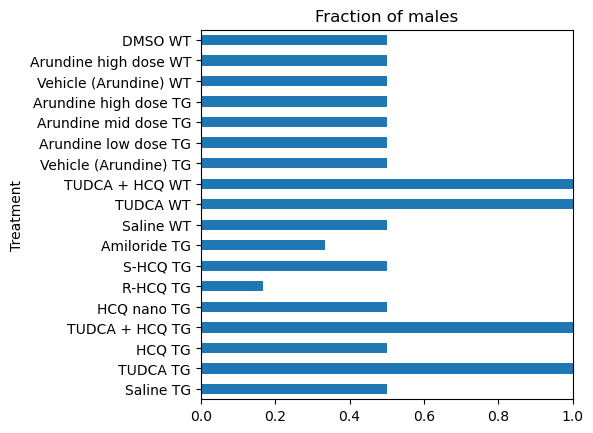

In [5]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
Abeta_long.groupby('Treatment')['Sex'].apply(lambda x: sum(x == 'm') / sum(x.isin(['m', 'f']))).plot(kind='barh', ax=ax)
ax.set_xlim(0, 1)
ax.set_title('Fraction of males')

## Modeling

In [6]:
default_formula = 'np.log(Ab) ~ Treatment + Alloform + Region + Fraction'

def fit_one(formula=default_formula, study='CO28154', treatments=['Saline TG', 'TUDCA + HCQ TG'], Abeta_long=Abeta_long):
    data = Abeta_long.loc[(Abeta_long.Treatment.isin(treatments)) & (Abeta_long.Study == study)]
    data['Treatment'] = pd.Categorical(data.Treatment, ordered=True, categories=treatments)
    result = smf.ols(formula, data=data.dropna()).fit()
    return(result)

res = fit_one()
res.summary()

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/3653947558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Treatment'] = pd.Categorical(data.Treatment, ordered=True, categories=treatments)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(Ab)   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     764.7
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           5.41e-68
Time:                        12:38:21   Log-Likelihood:                -53.374
No. Observations:                  94   AIC:                             116.7
Df Residuals:                      89   BIC:                             129.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       9.1543      0.100     91.227      0.000       8.955       9.354
Treatment[T.TUDCA + HCQ TG]    -0.3039      0.091     -3.358      0.001      -0.484      -0.124
Alloform[T.Aβ42]                1.6863      0.091     18.618      0.000       1.506       1.866
Region[T.hippocampus]           0.7760      0.091      8.568      0.000       0.596       0.956
Fraction[T.DEA]                -4.7000      0.091    -51.891      0.000      -4.880      -4.520
==============================================================================
Omnibus:                        3.111   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.825
Skew:                           0.425   Prob(JB):                        0.244
Kurtosis:                       2.993   Cond. No.                         4.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
formula_l = [
    'np.log(Ab) ~ Treatment',
    'np.log(Ab) ~ Treatment + Alloform + Region + Fraction',
    'np.log(Ab) ~ Treatment + Alloform + Region + Fraction + Treatment * Region * Fraction - Treatment : Region : Fraction',
    'np.log(Ab) ~ (Treatment + Alloform + Region + Fraction) ** 2',
    #'np.log(Ab) ~ 1 + Treatment : Alloform + Treatment : Region + Treatment : Fraction + Alloform : Region + Alloform : Fraction + Region : Fraction',
    #'np.log(Ab) ~ 0 + Treatment : Alloform + Treatment : Region + Treatment : Fraction + Alloform : Region + Alloform : Fraction + Region : Fraction',
    'np.log(Ab) ~ (Treatment + Alloform + Region + Fraction + Sex) ** 2',
]

study_treatment_l = [
    ('CO28154', ('Saline TG', 'TUDCA + HCQ TG')),
    ('CO28152', ('Saline TG', 'TUDCA TG', 'HCQ TG')),
    ('CO28152', ('Saline TG', 'HCQ TG', 'HCQ nano TG', 'R-HCQ TG', 'S-HCQ TG')),
    ('CO28154', ('Vehicle (Arundine) TG', 'Arundine low dose TG', 'Arundine mid dose TG', 'Arundine high dose TG')),
]

study_experiment_l = [
    ('CO28154', 'TUDCA and HCQ'),
    ('CO28152', 'TUDCA or HCQ'),
    ('CO28152', 'HCQ analogs'),
    ('CO28154', 'Arundine'),
]

def fit_all(formula_l=formula_l, study_treatment_l=study_treatment_l, study_experiment_l=study_experiment_l, Abeta_long=Abeta_long):
    a = np.array([[fit_one(f, *st, Abeta_long=Abeta_long) for st in study_treatment_l] for f in formula_l])
    results = pd.DataFrame(a, index=formula_l, columns=pd.MultiIndex.from_tuples(study_experiment_l))
    return(results)

results = fit_all(Abeta_long=Abeta_long)
results_m = fit_all(Abeta_long=Abeta_long.loc[Abeta_long.Sex == 'm'])

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/3653947558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Treatment'] = pd.Categorical(data.Treatment, ordered=True, categories=treatments)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/3653947558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Treatment'] = pd.Categorical(data.Treatment, ordered=True, categories=treatments)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/3653947558.py:5

In [8]:
results.applymap(lambda x: jarque_bera(x.resid)[1])

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/3148171132.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results.applymap(lambda x: jarque_bera(x.resid)[1])


CO28154      CO28152  \
                                                   TUDCA and HCQ TUDCA or HCQ   
np.log(Ab) ~ Treatment                                  0.016181     0.002851   
np.log(Ab) ~ Treatment + Alloform + Region + Fr...      0.243551     0.940666   
np.log(Ab) ~ Treatment + Alloform + Region + Fr...      0.406849     0.739999   
np.log(Ab) ~ (Treatment + Alloform + Region + F...      0.384774     0.101717   
np.log(Ab) ~ (Treatment + Alloform + Region + F...      0.608773     0.700368   

                                                                 CO28154  
                                                   HCQ analogs  Arundine  
np.log(Ab) ~ Treatment                                0.000029  0.000476  
np.log(Ab) ~ Treatment + Alloform + Region + Fr...    0.635569  0.000000  
np.log(Ab) ~ Treatment + Alloform + Region + Fr...    0.579061  0.000000  
np.log(Ab) ~ (Treatment + Alloform + Region + F...    0.146747  0.000000  
np.log(Ab) ~ (Treatment + Alloform + Region + F...    0.493309  0.000000

In [9]:
results.applymap(lambda x: x.bic)

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/84735346.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results.applymap(lambda x: x.bic)


CO28154      CO28152  \
                                                   TUDCA and HCQ TUDCA or HCQ   
np.log(Ab) ~ Treatment                                450.681943   676.709812   
np.log(Ab) ~ Treatment + Alloform + Region + Fr...    129.464859   112.859711   
np.log(Ab) ~ Treatment + Alloform + Region + Fr...    120.918568    88.710753   
np.log(Ab) ~ (Treatment + Alloform + Region + F...    101.036774    57.896959   
np.log(Ab) ~ (Treatment + Alloform + Region + F...     89.077745    24.353313   

                                                                    CO28154  
                                                    HCQ analogs    Arundine  
np.log(Ab) ~ Treatment                              1139.702854  950.275223  
np.log(Ab) ~ Treatment + Alloform + Region + Fr...   196.089089  697.972230  
np.log(Ab) ~ Treatment + Alloform + Region + Fr...   165.826111  729.066640  
np.log(Ab) ~ (Treatment + Alloform + Region + F...   105.231219  750.009737  
np.log(Ab) ~ (Treatment + Alloform + Region + F...    30.098784  754.954130

In [10]:
sel_attributes = ['params', 'bse', 'pvalues']
def helper_params(col, row='np.log(Ab) ~ (Treatment + Alloform + Region + Fraction) ** 2'):
    def helper(res, dataset='full'):
        df = pd.concat([getattr(res.loc[row, col], a).to_frame(a) for a in sel_attributes], axis=1)
        df = pd.DataFrame(df.to_numpy(), index=df.index, columns=pd.MultiIndex.from_product([[dataset], df.columns]))
        return(df)
    val = pd.concat([helper(r, d) for r, d in zip([results, results_m], ['both sexes', 'males only'])], axis=1)
    return(val)
    
results_params = {c: helper_params(c) for c in results.columns}
with pd.ExcelWriter('../../results/2024-08-08-biochemistry/results-params.xlsx') as writer:
    for k, v in results_params.items():
        v.to_excel(writer, sheet_name=k[1])

In [11]:
results_params[('CO28154', 'TUDCA and HCQ')]

both sexes            \
                                                      params       bse   
Intercept                                           9.222642  0.114494   
Treatment[T.TUDCA + HCQ TG]                        -0.635220  0.137932   
Alloform[T.Aβ42]                                    2.123264  0.138742   
Region[T.hippocampus]                               0.419143  0.138742   
Fraction[T.DEA]                                    -4.729629  0.138742   
Treatment[T.TUDCA + HCQ TG]:Alloform[T.Aβ42]        0.182799  0.139491   
Treatment[T.TUDCA + HCQ TG]:Region[T.hippocampus]   0.362105  0.139491   
Treatment[T.TUDCA + HCQ TG]:Fraction[T.DEA]         0.126590  0.139491   
Alloform[T.Aβ42]:Region[T.hippocampus]             -0.327938  0.139604   
Alloform[T.Aβ42]:Fraction[T.DEA]                   -0.734856  0.139604   
Region[T.hippocampus]:Fraction[T.DEA]               0.673583  0.139604   

                                                                males only  \
                                                        pvalues     params   
Intercept                                          1.420520e-80   8.853977   
Treatment[T.TUDCA + HCQ TG]                        1.470138e-05  -0.327158   
Alloform[T.Aβ42]                                   6.941972e-26   2.339617   
Region[T.hippocampus]                              3.348331e-03   0.565150   
Fraction[T.DEA]                                    1.401984e-50  -4.660383   
Treatment[T.TUDCA + HCQ TG]:Alloform[T.Aβ42]       1.936518e-01   0.005987   
Treatment[T.TUDCA + HCQ TG]:Region[T.hippocampus]  1.115498e-02   0.330832   
Treatment[T.TUDCA + HCQ TG]:Fraction[T.DEA]        3.667604e-01   0.146856   
Alloform[T.Aβ42]:Region[T.hippocampus]             2.119769e-02  -0.388575   
Alloform[T.Aβ42]:Fraction[T.DEA]                   1.086412e-06  -0.750552   
Region[T.hippocampus]:Fraction[T.DEA]              6.282930e-06   0.507503   

                                                                           
                                                        bse       pvalues  
Intercept                                          0.123204  6.558046e-60  
Treatment[T.TUDCA + HCQ TG]                        0.134892  1.832047e-02  
Alloform[T.Aβ42]                                   0.142189  6.497839e-24  
Region[T.hippocampus]                              0.142189  1.918373e-04  
Fraction[T.DEA]                                    0.143089  7.609302e-40  
Treatment[T.TUDCA + HCQ TG]:Alloform[T.Aβ42]       0.135426  9.648826e-01  
Treatment[T.TUDCA + HCQ TG]:Region[T.hippocampus]  0.135426  1.753095e-02  
Treatment[T.TUDCA + HCQ TG]:Fraction[T.DEA]        0.135426  2.825268e-01  
Alloform[T.Aβ42]:Region[T.hippocampus]             0.128183  3.590497e-03  
Alloform[T.Aβ42]:Fraction[T.DEA]                   0.128183  2.140460e-07  
Region[T.hippocampus]:Fraction[T.DEA]              0.128183  2.019205e-04

In [12]:
results_params[('CO28152', 'TUDCA or HCQ')]

both sexes            \
                                                params       bse   
Intercept                                     9.019984  0.077976   
Treatment[T.TUDCA TG]                        -0.298075  0.099152   
Treatment[T.HCQ TG]                          -0.022606  0.099152   
Alloform[T.Aβ42]                              2.135824  0.090560   
Region[T.hippocampus]                         0.308974  0.089991   
Fraction[T.DEA]                              -4.616591  0.089991   
Treatment[T.TUDCA TG]:Alloform[T.Aβ42]        0.119395  0.099152   
Treatment[T.HCQ TG]:Alloform[T.Aβ42]         -0.073335  0.099152   
Treatment[T.TUDCA TG]:Region[T.hippocampus]   0.165884  0.099152   
Treatment[T.HCQ TG]:Region[T.hippocampus]     0.095399  0.099152   
Treatment[T.TUDCA TG]:Fraction[T.DEA]        -0.005394  0.099152   
Treatment[T.HCQ TG]:Fraction[T.DEA]           0.020683  0.099152   
Alloform[T.Aβ42]:Region[T.hippocampus]       -0.071547  0.081127   
Alloform[T.Aβ42]:Fraction[T.DEA]             -0.573934  0.081127   
Region[T.hippocampus]:Fraction[T.DEA]         0.693696  0.081127   

                                                           males only  \
                                                   pvalues     params   
Intercept                                    1.411937e-130   8.713528   
Treatment[T.TUDCA TG]                         3.188498e-03  -0.005763   
Treatment[T.HCQ TG]                           8.200203e-01   0.038972   
Alloform[T.Aβ42]                              3.087360e-48   2.239220   
Region[T.hippocampus]                         8.053729e-04   0.449459   
Fraction[T.DEA]                               9.235024e-87  -4.503648   
Treatment[T.TUDCA TG]:Alloform[T.Aβ42]        2.307669e-01   0.045520   
Treatment[T.HCQ TG]:Alloform[T.Aβ42]          4.608933e-01  -0.025787   
Treatment[T.TUDCA TG]:Region[T.hippocampus]   9.678344e-02   0.045158   
Treatment[T.HCQ TG]:Region[T.hippocampus]     3.378000e-01   0.027515   
Treatment[T.TUDCA TG]:Fraction[T.DEA]         9.567048e-01  -0.109120   
Treatment[T.HCQ TG]:Fraction[T.DEA]           8.350928e-01  -0.087385   
Alloform[T.Aβ42]:Region[T.hippocampus]        3.794863e-01  -0.110971   
Alloform[T.Aβ42]:Fraction[T.DEA]              8.972634e-11  -0.592272   
Region[T.hippocampus]:Fraction[T.DEA]         3.328857e-14   0.692319   

                                                                     
                                                  bse       pvalues  
Intercept                                    0.085929  2.852636e-86  
Treatment[T.TUDCA TG]                        0.096924  9.527343e-01  
Treatment[T.HCQ TG]                          0.111481  7.275714e-01  
Alloform[T.Aβ42]                             0.096924  3.825182e-37  
Region[T.hippocampus]                        0.096546  1.265715e-05  
Fraction[T.DEA]                              0.096546  8.842930e-60  
Treatment[T.TUDCA TG]:Alloform[T.Aβ42]       0.096924  6.398806e-01  
Treatment[T.HCQ TG]:Alloform[T.Aβ42]         0.111481  8.176609e-01  
Treatment[T.TUDCA TG]:Region[T.hippocampus]  0.096924  6.425454e-01  
Treatment[T.HCQ TG]:Region[T.hippocampus]    0.111481  8.056839e-01  
Treatment[T.TUDCA TG]:Fraction[T.DEA]        0.096924  2.636032e-01  
Treatment[T.HCQ TG]:Fraction[T.DEA]          0.111481  4.354404e-01  
Alloform[T.Aβ42]:Region[T.hippocampus]       0.079292  1.655191e-01  
Alloform[T.Aβ42]:Fraction[T.DEA]             0.079292  8.775621e-11  
Region[T.hippocampus]:Fraction[T.DEA]        0.079292  2.963832e-13

In [13]:
results_params[('CO28152', 'HCQ analogs')]

both sexes            \
                                                   params       bse   
Intercept                                        8.993251  0.075484   
Treatment[T.HCQ TG]                             -0.021893  0.100097   
Treatment[T.HCQ nano TG]                         0.095525  0.100097   
Treatment[T.R-HCQ TG]                            0.336855  0.099525   
Treatment[T.S-HCQ TG]                            0.061614  0.099525   
Alloform[T.Aβ42]                                 2.178240  0.083491   
Region[T.hippocampus]                            0.335812  0.083269   
Fraction[T.DEA]                                 -4.578916  0.083269   
Treatment[T.HCQ TG]:Alloform[T.Aβ42]            -0.072622  0.100097   
Treatment[T.HCQ nano TG]:Alloform[T.Aβ42]       -0.110726  0.100097   
Treatment[T.R-HCQ TG]:Alloform[T.Aβ42]          -0.082230  0.099525   
Treatment[T.S-HCQ TG]:Alloform[T.Aβ42]           0.012896  0.099525   
Treatment[T.HCQ TG]:Region[T.hippocampus]        0.094686  0.100097   
Treatment[T.HCQ nano TG]:Region[T.hippocampus]   0.156470  0.100097   
Treatment[T.R-HCQ TG]:Region[T.hippocampus]     -0.130138  0.099525   
Treatment[T.S-HCQ TG]:Region[T.hippocampus]     -0.034231  0.099525   
Treatment[T.HCQ TG]:Fraction[T.DEA]              0.019970  0.100097   
Treatment[T.HCQ nano TG]:Fraction[T.DEA]        -0.038944  0.100097   
Treatment[T.R-HCQ TG]:Fraction[T.DEA]           -0.117242  0.099525   
Treatment[T.S-HCQ TG]:Fraction[T.DEA]           -0.128227  0.099525   
Alloform[T.Aβ42]:Region[T.hippocampus]          -0.103127  0.063239   
Alloform[T.Aβ42]:Fraction[T.DEA]                -0.627186  0.063239   
Region[T.hippocampus]:Fraction[T.DEA]            0.671598  0.063239   

                                                              males only  \
                                                      pvalues     params   
Intercept                                       2.633373e-198   8.689712   
Treatment[T.HCQ TG]                              8.270791e-01   0.038972   
Treatment[T.HCQ nano TG]                         3.409917e-01   0.121895   
Treatment[T.R-HCQ TG]                            8.471009e-04   0.387556   
Treatment[T.S-HCQ TG]                            5.365207e-01   0.186800   
Alloform[T.Aβ42]                                 1.498307e-68   2.315630   
Region[T.hippocampus]                            7.653248e-05   0.453458   
Fraction[T.DEA]                                 1.318320e-128  -4.488793   
Treatment[T.HCQ TG]:Alloform[T.Aβ42]             4.689235e-01  -0.025787   
Treatment[T.HCQ nano TG]:Alloform[T.Aβ42]        2.698834e-01  -0.025201   
Treatment[T.R-HCQ TG]:Alloform[T.Aβ42]           4.095918e-01  -0.062673   
Treatment[T.S-HCQ TG]:Alloform[T.Aβ42]           8.970244e-01  -0.019670   
Treatment[T.HCQ TG]:Region[T.hippocampus]        3.452372e-01   0.027515   
Treatment[T.HCQ nano TG]:Region[T.hippocampus]   1.194808e-01   0.096102   
Treatment[T.R-HCQ TG]:Region[T.hippocampus]      1.924093e-01  -0.044659   
Treatment[T.S-HCQ TG]:Region[T.hippocampus]      7.312281e-01  -0.007583   
Treatment[T.HCQ TG]:Fraction[T.DEA]              8.420519e-01  -0.087385   
Treatment[T.HCQ nano TG]:Fraction[T.DEA]         6.976147e-01  -0.126082   
Treatment[T.R-HCQ TG]:Fraction[T.DEA]            2.400932e-01  -0.290870   
Treatment[T.S-HCQ TG]:Fraction[T.DEA]            1.989943e-01  -0.339066   
Alloform[T.Aβ42]:Region[T.hippocampus]           1.044070e-01  -0.176524   
Alloform[T.Aβ42]:Fraction[T.DEA]                 2.481531e-19  -0.679537   
Region[T.hippocampus]:Fraction[T.DEA]            1.881028e-21   0.749874   

                                                                        
                                                     bse       pvalues  
Intercept                                       0.085878  4.874942e-87  
Treatment[T.HCQ TG]                             0.112133  7.290787e-01  
Treatment[T.HCQ nano TG]                        0.112133  2.802334e-01  
Treat

In [14]:
results_params[('CO28154', 'Arundine')]

both sexes            \
                                                       params       bse   
Intercept                                            9.055148  0.463573   
Treatment[T.Arundine low dose TG]                    0.113679  0.599480   
Treatment[T.Arundine mid dose TG]                   -0.370168  0.639019   
Treatment[T.Arundine high dose TG]                   0.136428  0.599480   
Alloform[T.Aβ42]                                     2.049575  0.530147   
Region[T.hippocampus]                                0.383632  0.527188   
Fraction[T.DEA]                                     -4.849695  0.526425   
Treatment[T.Arundine low dose TG]:Alloform[T.Aβ42]  -0.180735  0.606333   
Treatment[T.Arundine mid dose TG]:Alloform[T.Aβ42]  -0.957427  0.620788   
Treatment[T.Arundine high dose TG]:Alloform[T.A...  -0.105214  0.606333   
Treatment[T.Arundine low dose TG]:Region[T.hipp...   0.035145  0.606412   
Treatment[T.Arundine mid dose TG]:Region[T.hipp...   0.207284  0.621031   
Treatment[T.Arundine high dose TG]:Region[T.hip...   0.012181  0.606412   
Treatment[T.Arundine low dose TG]:Fraction[T.DEA]   -0.009776  0.606412   
Treatment[T.Arundine mid dose TG]:Fraction[T.DEA]   -0.627947  0.622245   
Treatment[T.Arundine high dose TG]:Fraction[T.DEA]  -0.054423  0.606412   
Alloform[T.Aβ42]:Region[T.hippocampus]              -0.119393  0.431133   
Alloform[T.Aβ42]:Fraction[T.DEA]                    -0.526953  0.431592   
Region[T.hippocampus]:Fraction[T.DEA]                0.815411  0.431622   

                                                                 males only  \
                                                         pvalues     params   
Intercept                                           5.492159e-45   9.034344   
Treatment[T.Arundine low dose TG]                   8.498302e-01  -0.209550   
Treatment[T.Arundine mid dose TG]                   5.631840e-01  -0.235144   
Treatment[T.Arundine high dose TG]                  8.202527e-01   0.095085   
Alloform[T.Aβ42]                                    1.581649e-04   2.142151   
Region[T.hippocampus]                               4.678190e-01   0.461623   
Fraction[T.DEA]                                     1.317510e-16  -4.827635   
Treatment[T.Arundine low dose TG]:Alloform[T.Aβ42]  7.660141e-01  -0.000131   
Treatment[T.Arundine mid dose TG]:Alloform[T.Aβ42]  1.248992e-01   0.029737   
Treatment[T.Arundine high dose TG]:Alloform[T.A...  8.624486e-01  -0.052473   
Treatment[T.Arundine low dose TG]:Region[T.hipp...  9.538536e-01   0.094058   
Treatment[T.Arundine mid dose TG]:Region[T.hipp...  7.389684e-01   0.082801   
Treatment[T.Arundine high dose TG]:Region[T.hip...  9.839980e-01  -0.046660   
Treatment[T.Arundine low dose TG]:Fraction[T.DEA]   9.871576e-01   0.095286   
Treatment[T.Arundine mid dose TG]:Fraction[T.DEA]   3.143559e-01   0.189440   
Treatment[T.Arundine high dose TG]:Fraction[T.DEA]  9.285964e-01  -0.098506   
Alloform[T.Aβ42]:Region[T.hippocampus]              7.821775e-01  -0.251429   
Alloform[T.Aβ42]:Fraction[T.DEA]                    2.238254e-01  -0.658706   
Region[T.hippocampus]:Fraction[T.DEA]               6.060141e-02   0.793090   

                                                                            
                                                         bse       pvalues  
Intercept                                           0.130909  2.598107e-70  
Treatment[T.Arundine low dose TG]                   0.169832  2.210558e-01  
Treatment[T.Arundine mid dose TG]                   0.169832  1.702355e-01  
Treatment[T.Arundine high dose TG]                  0.169832  5.772118e-01  
Alloform[T.Aβ42]                                    0.149604  2.785743e-23  
Region[T.hippocampus]                               0.147714  2.516954e-03  
Fraction[T.DEA]                                     0.149604  4.123078e-46  
Treatment[T.Arundine low dose TG]:Alloform[T.Aβ42]  0.172023  9.993955e-01  
Treatment[T.Arundine mid dose TG]:Alloform[T.

## Plotting results

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Treatment'] = pd.Categorical(data.Treatment, ordered=True, categories=treatments)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Treatment'] = pd.Categorical(data.Treatment, ordered=True, categories=treatments)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6

['named-figure/boxplot-Abeta-TUDCA-and-HCQ.png',
 'named-figure/boxplot-Abeta-TUDCA-and-HCQ.pdf']

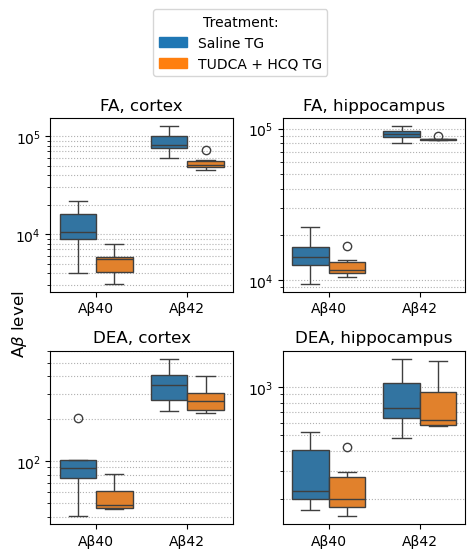

In [15]:
def my_plot_ax(ax, treatments=['Saline TG', 'TUDCA + HCQ TG'], study='CO28154', x='Alloform', hue='Treatment',
               palette={'Saline TG': 'C0', 'TUDCA + HCQ TG':'C1'}, subsetd={'Fraction': 'FA', 'Region': 'cortex'}, Abeta_long=Abeta_long):
    b = (Abeta_long.Treatment.isin(treatments)) & (Abeta_long.Study == study)
    b = b & (Abeta_long[list(subsetd.keys())[0]] == list(subsetd.values())[0]) & (Abeta_long[list(subsetd.keys())[1]] == list(subsetd.values())[1])
    data = Abeta_long.loc[b]
    data['Treatment'] = pd.Categorical(data.Treatment, ordered=True, categories=treatments)
    sns.boxplot(x=x, y='Ab', hue=hue, palette=palette, data=data, ax=ax, legend=False)
    ax.set_yscale('log')
    ax.set_title(', '.join(list(subsetd.values())))
    ax.grid(which='both', axis='y', linestyle='dotted')
    return(ax)

def my_plot(treatments=['Saline TG', 'TUDCA + HCQ TG'], study='CO28154', colors=['C0', 'C1']):
    palette = dict(zip(treatments, colors))
    fig, ax = plt.subplots(2, 2, figsize=(4.8, 4.8))
    for i, fraction in enumerate(['FA', 'DEA']):
        for j, region in enumerate(['cortex', 'hippocampus']):
            axi = ax[i, j]
            axi = my_plot_ax(axi, treatments=treatments, study=study, x='Alloform', hue='Treatment', palette=palette, subsetd={'Fraction': fraction, 'Region': region})
            axi.set_xlabel('')
            axi.set_ylabel('')
    handles = [mpatches.Patch(color=c) for c in palette.values()]
    fig.legend(handles=handles, labels=treatments, loc='lower center', bbox_to_anchor=(0.5, 1.0), title='Treatment:')
    fig.tight_layout()
    fig.supylabel(r'A$\beta$ level')
    #fig.supxlabel(r'Alloform')
    return((fig, ax))

treatments = ['Saline TG', 'TUDCA + HCQ TG']

fig, ax = my_plot(treatments=treatments, study='CO28154')
attila_utils.savefig(fig, 'boxplot-Abeta-TUDCA-and-HCQ')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Treatment'] = pd.Categorical(data.Treatment, ordered=True, categories=treatments)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Treatment'] = pd.Categorical(data.Treatment, ordered=True, categories=treatments)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6

['named-figure/boxplot-Abeta-TUDCA-and-HCQ-with-WT.png',
 'named-figure/boxplot-Abeta-TUDCA-and-HCQ-with-WT.pdf']

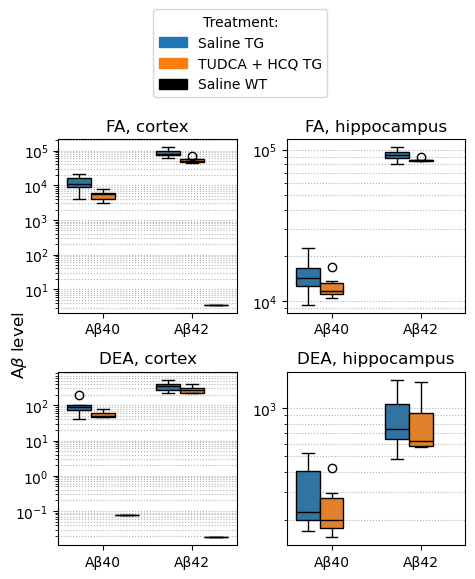

In [16]:
treatments = ['Saline TG', 'TUDCA + HCQ TG', 'Saline WT']
colors = ['C0', 'C1', 'k']
fig, ax = my_plot(treatments=treatments, study='CO28154', colors=colors)
attila_utils.savefig(fig, 'boxplot-Abeta-TUDCA-and-HCQ-with-WT')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Treatment'] = pd.Categorical(data.Treatment, ordered=True, categories=treatments)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Treatment'] = pd.Categorical(data.Treatment, ordered=True, categories=treatments)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6

['named-figure/boxplot-Abeta-TUDCA-or-HCQ.png',
 'named-figure/boxplot-Abeta-TUDCA-or-HCQ.pdf']

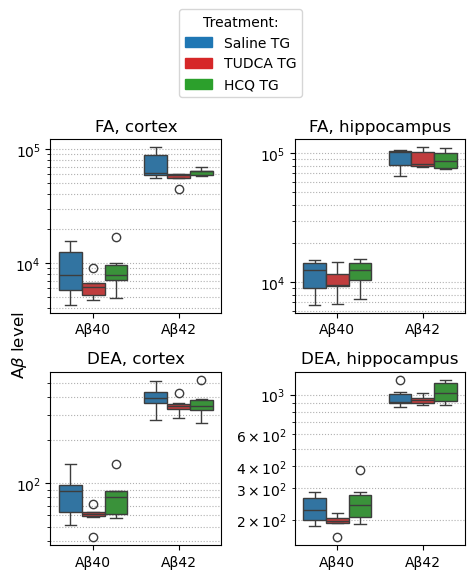

In [17]:
treatments = ['Saline TG', 'TUDCA TG', 'HCQ TG']
colors = ['C0', 'C3', 'C2']
fig, ax = my_plot(treatments=treatments, study='CO28152', colors=colors)
attila_utils.savefig(fig, 'boxplot-Abeta-TUDCA-or-HCQ')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Treatment'] = pd.Categorical(data.Treatment, ordered=True, categories=treatments)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Treatment'] = pd.Categorical(data.Treatment, ordered=True, categories=treatments)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6

['named-figure/boxplot-Abeta-HCQ-analogs.png',
 'named-figure/boxplot-Abeta-HCQ-analogs.pdf']

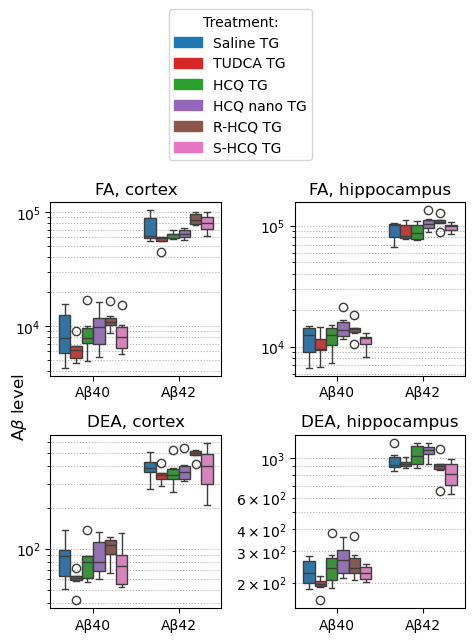

In [18]:
treatments = ['Saline TG', 'TUDCA TG', 'HCQ TG', 'HCQ nano TG', 'R-HCQ TG', 'S-HCQ TG']
colors = ['C0', 'C3', 'C2', 'C4', 'C5', 'C6']
fig, ax = my_plot(treatments=treatments, study='CO28152', colors=colors)
attila_utils.savefig(fig, 'boxplot-Abeta-HCQ-analogs')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Treatment'] = pd.Categorical(data.Treatment, ordered=True, categories=treatments)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Treatment'] = pd.Categorical(data.Treatment, ordered=True, categories=treatments)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6

['named-figure/boxplot-Abeta-arundine.png',
 'named-figure/boxplot-Abeta-arundine.pdf']

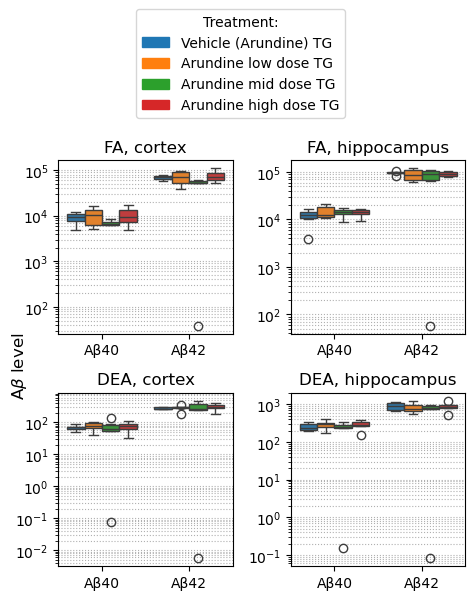

In [19]:
treatments = ['Vehicle (Arundine) TG', 'Arundine low dose TG', 'Arundine mid dose TG', 'Arundine high dose TG']
colors = ['C' + str(i) for i, t in enumerate(treatments)]
fig, ax = my_plot(treatments=treatments, study='CO28154', colors=colors)
attila_utils.savefig(fig, 'boxplot-Abeta-arundine')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Treatment'] = pd.Categorical(data.Treatment, ordered=True, categories=treatments)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Treatment'] = pd.Categorical(data.Treatment, ordered=True, categories=treatments)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_89979/2078074748.py:6

['named-figure/boxplot-Abeta-arundine-with-WT.png',
 'named-figure/boxplot-Abeta-arundine-with-WT.pdf']

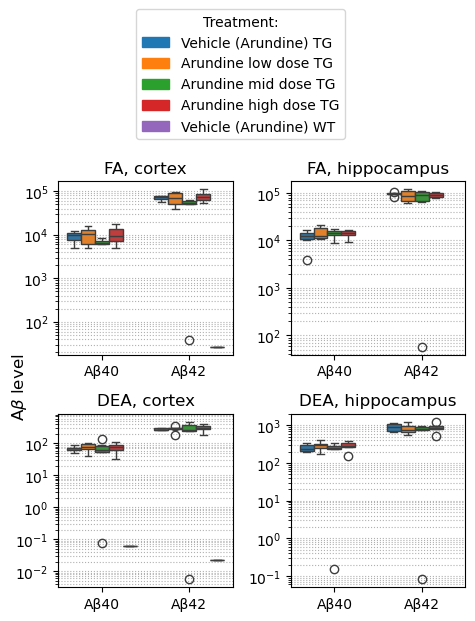

In [20]:
treatments = ['Vehicle (Arundine) TG', 'Arundine low dose TG', 'Arundine mid dose TG', 'Arundine high dose TG', 'Vehicle (Arundine) WT']
colors = ['C' + str(i) for i, t in enumerate(treatments)]
fig, ax = my_plot(treatments=treatments, study='CO28154', colors=colors)
attila_utils.savefig(fig, 'boxplot-Abeta-arundine-with-WT')

In [21]:
%connect_info

{
  "shell_port": 62539,
  "iopub_port": 62540,
  "stdin_port": 62541,
  "control_port": 62543,
  "hb_port": 62542,
  "ip": "127.0.0.1",
  "key": "ad4ff1e1-9b84fe518a01bb580649b0e5",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "conda-base-py",
  "jupyter_session": "/Users/jonesa7/CTNS/notebooks/2024-08-08-biochemistry/2024-08-08-biochemistry.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-58e6d11d-5cd0-42de-89eb-05ebe166802b.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
